In [3]:
import pandas as pd

df= pd.read_csv('./dataset/final_dataset.csv', encoding='utf-8')

In [4]:
df = df.drop(columns=['word_count'])

In [5]:
df

,Category,Combined
0,Social,official airdrop thrilled reveal blue official...
1,Social,view finally supporting start joining excited ...
2,Social,hey keep one core mission ce best story perfec...
3,Social,diga lab closed seed round million valuation t...
4,Promotions,view email browser big sqd token sale partners...
...,...,...
14391,Primary,attached telephone contact list personnel work...
14392,Primary,last president caught tornado spin oz threaten...
14393,Primary,noticed missed jim course attendance forwarded...
14394,Primary,doomat denise williams pm gebenefits cc tehach...


In [6]:
df.isnull().sum()

Category    0
Combined    0
dtype: int64

In [7]:
df.duplicated().sum()

560

In [8]:
df= df.drop_duplicates(keep='first')

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])

C:\Users\bisun\AppData\Local\Temp\ipykernel_4964\621239122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = encoder.fit_transform(df['Category'])


In [10]:
import joblib

pkl_path = './pkl/label_encoder.pkl'

# Assuming 'encoder' is the object you want to dump
joblib.dump(encoder, pkl_path)

['./pkl/label_encoder.pkl']

In [11]:
import nltk
nltk.download('punkt')
df['word_count'] = df['Combined'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bisun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\bisun\AppData\Local\Temp\ipykernel_4964\1982653913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['Combined'].apply(lambda x: len(nltk.word_tokenize(x)))


In [12]:
df['Category'].value_counts()

Category
0    4956
2    3711
1    3710
3    1459
Name: count, dtype: int64

In [13]:
df['word_count'].describe(percentiles=[0.90])

count    13836.000000
mean       103.101185
std         70.445873
min         30.000000
50%         93.000000
90%        158.000000
max       2591.000000
Name: word_count, dtype: float64

In [14]:
y = df['Category']
X = df.loc[:,df.columns=='Combined']
X

,Combined
0,official airdrop thrilled reveal blue official...
1,view finally supporting start joining excited ...
2,hey keep one core mission ce best story perfec...
3,diga lab closed seed round million valuation t...
4,view email browser big sqd token sale partners...
...,...
14391,attached telephone contact list personnel work...
14392,last president caught tornado spin oz threaten...
14393,noticed missed jim course attendance forwarded...
14394,doomat denise williams pm gebenefits cc tehach...


In [15]:
# Assuming df is your DataFrame with a column named 'combined'
corpus = ' '.join(X['Combined'].astype(str))

with open("./dataset/corpus.txt", "w", encoding="utf-8") as file:
    file.write(corpus)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
tokenizer =Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train['Combined'])

X_train_sequences = tokenizer.texts_to_sequences(X_train['Combined'].fillna(''))
X_test_sequences = tokenizer.texts_to_sequences(X_test['Combined'].fillna(''))

X_train_padded = pad_sequences(X_train_sequences,maxlen=150 , padding='post')
X_test_padded = pad_sequences(X_test_sequences,maxlen=150 ,padding='post')


len(tokenizer.word_index)

68718

In [19]:
tokenizer_path = './pkl/tokenizer.pkl'
joblib.dump(tokenizer,tokenizer_path)

['./pkl/tokenizer.pkl']

In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,SimpleRNN,Embedding,LSTM,GRU,Bidirectional,Dropout,BatchNormalization,Masking
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1,l2

In [21]:
import tensorflow as tf

print(tf.__version__)

2.16.0-rc0


In [22]:
embedding_dim =100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim),
    LSTM(5),
    Dense(4, activation='softmax')
])
#rejected

In [23]:
embedding_dim =100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim),
    LSTM(10),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])
#rejected

In [24]:
embedding_dim =100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim),
    LSTM(20 ,kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(20, activation='relu' ,kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(10, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(4, activation='softmax')
])
#rejected

In [25]:
embedding_dim =100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, mask_zero=True),
    Dropout(0.3),
    LSTM(20 ,return_sequences=True,kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(10, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(10,activation='relu' ,kernel_regularizer=l2(0.01)),
    Dense(4, activation='softmax')
])
#accepted1, lr =0.00007,0.98


In [26]:
embedding_dim =100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, mask_zero=True),
    BatchNormalization(),
    Dropout(0.35),
    LSTM(20 ,return_sequences=True,kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(10, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10,activation='relu' ,kernel_regularizer=l2(0.01)),
    Dense(4, activation='softmax')])

#accepted 2 ,lr 0.00005,0.98

In [27]:
embedding_dim =100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, mask_zero=True),
    BatchNormalization(),
    Dropout(0.25),
    LSTM(20 ,return_sequences=True,kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(10, kernel_regularizer=l2(0.01)),
    Dense(10,activation='relu' ,kernel_regularizer=l2(0.01)),
    Dense(4, activation='softmax')])

#accepted3 , lr 0.00002, 0.98

In [28]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
embedding_dim =100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, mask_zero=True),
    BatchNormalization(),
    Dropout(0.35),
    LSTM(20 ,return_sequences=True,kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(16, kernel_regularizer=l2(0.01)),
    Dense(16,activation='relu' ,kernel_regularizer=l2(0.01)),
    Dense(4, activation='softmax')])

In [30]:
def lr_scheduler(epoch, lr):
    return lr * 0.98

learning_rate_scheduler = LearningRateScheduler(lr_scheduler)
optimizer = Adam(learning_rate=0.00005)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3 ,restore_best_weights=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train_padded, y_train, epochs=50,batch_size =128, validation_data=(X_test_padded,y_test))

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 32s 286ms/step - accuracy: 0.3232 - loss: 2.7037 - val_accuracy: 0.3457 - val_loss: 2.6524
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 26s 296ms/step - accuracy: 0.4065 - loss: 2.5941 - val_accuracy: 0.3457 - val_loss: 2.5601
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.4314 - loss: 2.4877 - val_accuracy: 0.3457 - val_loss: 2.4611
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.4674 - loss: 2.3797 - val_accuracy: 0.3819 - val_loss: 2.3548
Epoch 5/50
62/87 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.5024 - loss: 2.2735

In [ ]:
from tensorflow.keras.models import save_model

save_model(model, './models/accepted3.keras')

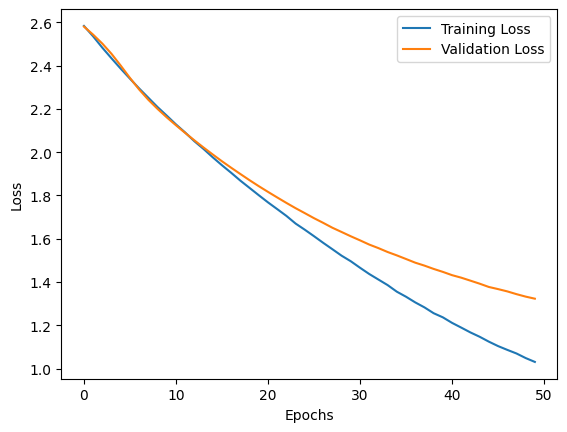

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

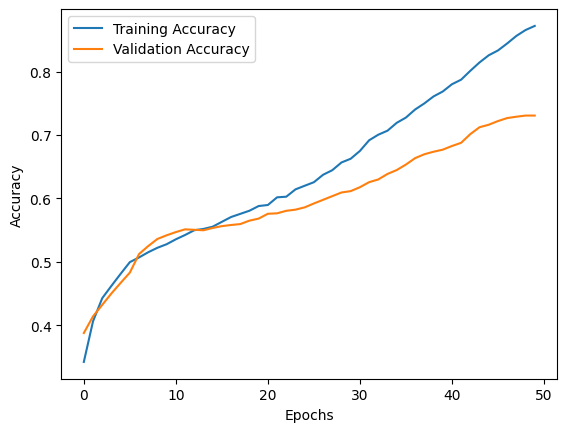

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import pickle
history_metrics = {
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss'],
    'accuracy': history.history['accuracy'],
    'val_accuracy':history.history['val_accuracy'],
}


with open('./history/accpeted2.pkl', 'wb') as file:
    pickle.dump(history_metrics, file)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('./models/accepted3.keras')

In [ ]:
from tensorflow.keras.utils import plot_model
import pydotplus, pydot, graphviz
plot_model(model, to_file='./figures/model_architecture.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
